In [4]:
import pickle
import pandas as pd
from collections import Counter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
city_list = ['Chicago', 'New York', 'San Francisco']
df_list = []

In [6]:
with open('jobs_descriptions.pk', 'rb') as handle:
    jobsCH = pickle.load(handle)

In [7]:
with open('jobs_descriptions_NY.pk', 'rb') as handle:
    jobsNY = pickle.load(handle)

In [8]:
with open('jobs_descriptions_SF.pk', 'rb') as handle:
    jobsSF = pickle.load(handle)

In [9]:
def make_dataframe(jobs):
    doc_frequency = Counter() # This will create a full counter of our terms. 
    [doc_frequency.update(item) for item in jobs] # List comp

    # Now we can just look at our final dict list inside doc_frequency
    # Obtain our key terms and store them in a dict. These are the key data science skills we are looking for

    prog_lang_dict = Counter({'R':doc_frequency['r'], 'Python':doc_frequency['python'],
                 'Java':doc_frequency['java'], 'C++':doc_frequency['c++'],
                'Ruby':doc_frequency['ruby'],
               'Perl':doc_frequency['perl'], 'Matlab':doc_frequency['matlab'],
               'JavaScript':doc_frequency['javascript'], 'Scala': doc_frequency['scala']})

    analysis_tool_dict = Counter({'Excel':doc_frequency['excel'],  'Tableau':doc_frequency['tableau'],
                   'D3.js':doc_frequency['d3.js'], 'SAS':doc_frequency['sas'],
                   'SPSS':doc_frequency['spss'], 'D3':doc_frequency['d3']})

    hadoop_dict = Counter({'Hadoop':doc_frequency['hadoop'], 'MapReduce':doc_frequency['mapreduce'],
            'Spark':doc_frequency['spark'], 'Pig':doc_frequency['pig'],
            'Hive':doc_frequency['hive'], 'Shark':doc_frequency['shark'],
            'Oozie':doc_frequency['oozie'], 'ZooKeeper':doc_frequency['zookeeper'],
            'Flume':doc_frequency['flume'], 'Mahout':doc_frequency['mahout']})

    database_dict = Counter({'SQL':doc_frequency['sql'], 'NoSQL':doc_frequency['nosql'],
              'HBase':doc_frequency['hbase'], 'Cassandra':doc_frequency['cassandra'],
              'MongoDB':doc_frequency['mongodb']})


    overall_total_skills = prog_lang_dict + analysis_tool_dict + hadoop_dict + database_dict # Combine our Counter objects

    new_d = dict(overall_total_skills)

    final_frame = pd.DataFrame(new_d, index=[0]).T.reset_index()
    final_frame.rename(columns={'index': 'Term', 0: 'NumPostings'}, inplace=True) # Convert these terms to a 
                                                                                             # dataframe 

    # Change the values to reflect a percentage of the postings 

    final_frame.NumPostings = (final_frame.NumPostings)*100/len(jobs) # Gives percentage of job postings 
                                                                               #  having that term 
    # Sort the data for plotting purposes
    final_frame = final_frame.sort_values(by = 'NumPostings', ascending = False)

    return final_frame

In [10]:
def make_barplot(df, name):
    sns.set_style('whitegrid')
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 8))


    # Plot the total crashes
    sns.barplot(x="Term", y="NumPostings", data=df,
                label="Total")

    ax.set(ylabel="Percentage Appearing in Job Ads",
           xlabel="Term", title = 'Percentage of Data Scientist Job Ads with a Key Skill ' + name)

In [11]:
def make_csv(dfs, cities):
    
    new_df = pd.DataFrame()
    my_dict = {k:v for k, v in zip(cities, dfs)}
    
    for k, v in my_dict.items():
        df = v.set_index('Term').rename(columns = {'NumPostings' :k})
        new_df = pd.concat([new_df, df], axis = 1)
    
    new_df.dropna(inplace = True)
        
    new_df.to_csv('city.csv', sep='\t')
    
    return new_df

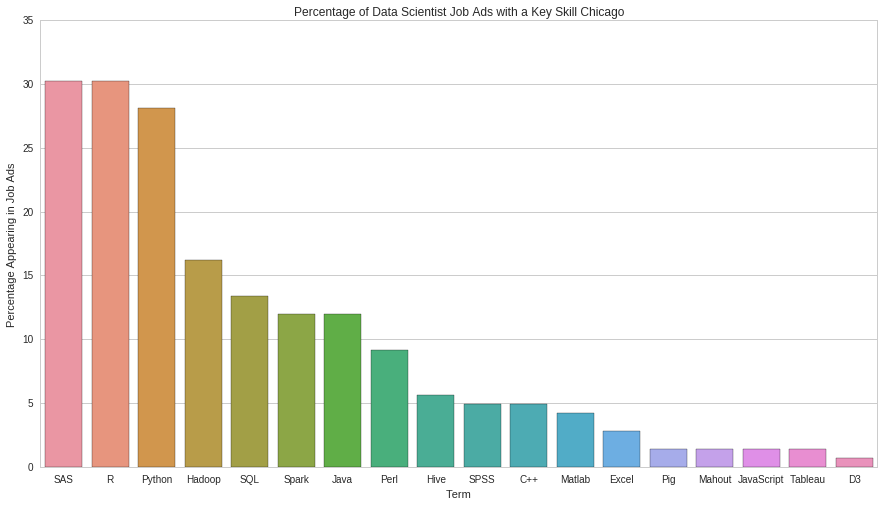

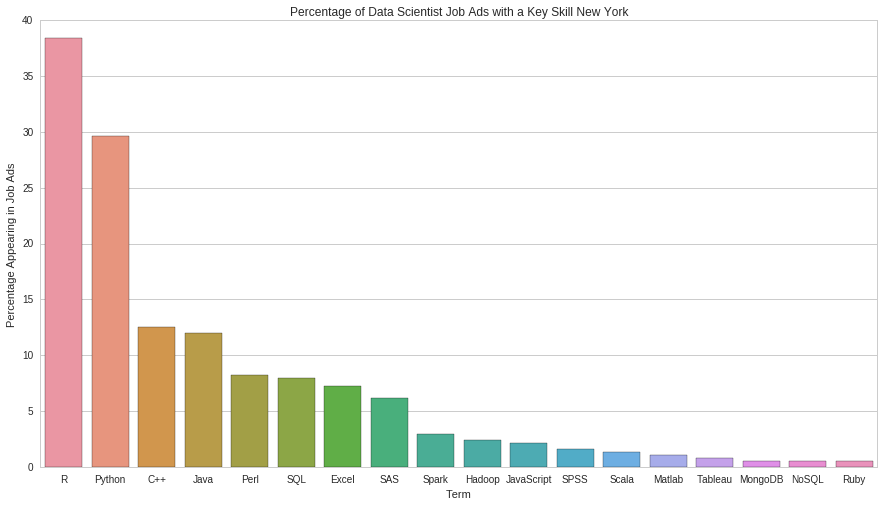

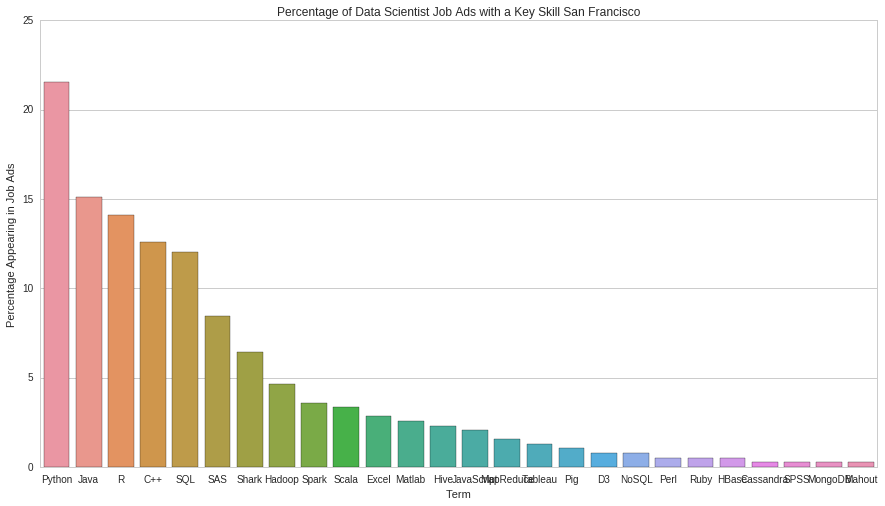

In [13]:
CH = make_dataframe(jobsCH)
make_barplot(CH, 'Chicago')
NY = make_dataframe(jobsNY)
make_barplot(NY, 'New York')
SF = make_dataframe(jobsSF)
make_barplot(SF, 'San Francisco')

In [14]:
dfs = [CH, NY, SF]
cities = ['Chicago', 'New York', 'San Francisco']

In [15]:
make_csv(dfs, cities)

,San Francisco,New York,Chicago
C++,12.564103,12.533333,4.929577
Excel,2.820513,7.200000,2.816901
Hadoop,4.615385,2.400000,16.197183
Java,15.128205,12.000000,11.971831
JavaScript,2.051282,2.133333,1.408451
Matlab,2.564103,1.066667,4.225352
Perl,0.512821,8.266667,9.154930
Python,21.538462,29.600000,28.169014
R,14.102564,38.400000,30.281690
SAS,8.461538,6.133333,30.281690
